In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

%matplotlib inline

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [7]:
# 加载nelson siegel svensson模型代码
%run ./src/nelson_siegel_svensson/__init__.py
%run ./src/nelson_siegel_svensson/calibrate.py
%run ./src/nelson_siegel_svensson/cli.py
%run ./src/nelson_siegel_svensson/ns.py
%run ./src/nelson_siegel_svensson/nss.py

Usage: cli.py [OPTIONS] COMMAND [ARGS]...

  Commandline interface for nelson_siegel_svensson.

Options:
  --help  Show this message and exit.

Commands:
  calibrate  Calibrate a curve to the given data points.
  evaluate   Evaluate a curve at given points.
  plot       Plot a curve at given points.


In [8]:
raw_df = pd.read_csv("./data/USA_END_MONTH_BOND_YIELD.csv", index_col=0)
raw_df

,Time_Period,RIFLGFCM01_N.B,RIFLGFCM03_N.B,RIFLGFCM06_N.B,RIFLGFCY01_N.B,RIFLGFCY02_N.B,RIFLGFCY03_N.B,RIFLGFCY05_N.B,RIFLGFCY07_N.B,RIFLGFCY10_N.B,...,MARGIN_RIFLGFCM03_N.B,MARGIN_RIFLGFCM06_N.B,MARGIN_RIFLGFCY01_N.B,MARGIN_RIFLGFCY02_N.B,MARGIN_RIFLGFCY03_N.B,MARGIN_RIFLGFCY05_N.B,MARGIN_RIFLGFCY07_N.B,MARGIN_RIFLGFCY10_N.B,MARGIN_RIFLGFCY20_N.B,MARGIN_RIFLGFCY30_N.B
0,1962-01-31,NaN,NaN,NaN,3.29,NaN,3.81,3.99,NaN,4.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962-02-28,NaN,NaN,NaN,3.21,NaN,3.53,3.77,NaN,4.00,...,NaN,NaN,-0.08,NaN,-0.28,-0.22,NaN,-0.10,-0.03,NaN
2,1962-03-30,NaN,NaN,NaN,2.97,NaN,3.39,3.61,NaN,3.86,...,NaN,NaN,-0.24,NaN,-0.14,-0.16,NaN,-0.14,-0.12,NaN
3,1962-04-30,NaN,NaN,NaN,3.07,NaN,3.47,3.64,NaN,3.86,...,NaN,NaN,0.10,NaN,0.08,0.03,NaN,0.00,-0.07,NaN
4,1962-05-31,NaN,NaN,NaN,2.99,NaN,3.36,3.66,NaN,3.90,...,NaN,NaN,-0.08,NaN,-0.11,0.02,NaN,0.04,0.03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,2022-11-30,4.07,4.37,4.70,4.74,4.38,4.13,3.82,3.76,3.68,...,0.15,0.13,0.08,-0.13,-0.32,-0.45,-0.42,-0.42,-0.44,-0.42
731,2022-12-30,4.12,4.42,4.76,4.73,4.41,4.22,3.99,3.96,3.88,...,0.05,0.06,-0.01,0.03,0.09,0.17,0.20,0.20,0.14,0.17
732,2023-01-31,4.58,4.70,4.80,4.68,4.21,3.90,3.63,3.59,3.52,...,0.28,0.04,-0.05,-0.20,-0.32,-0.36,-0.37,-0.36,-0.36,-0.32
733,2023-02-28,4.65,4.88,5.17,5.02,4.81,4.51,4.18,4.07,3.92,...,0.18,0.37,0.34,0.60,0.61,0.55,0.48,0.40,0.32,0.28


In [12]:
raw_df['Time_Period'] = pd.to_datetime(raw_df['Time_Period'])
raw_df['Time_Period_YM'] = pd.to_datetime(raw_df['Time_Period_YM'])

In [13]:
start_date_str = "1985-01-1"
end_date_str = "2008-12-31";

start_date = datetime.datetime.strptime(start_date_str, "%Y-%m-%d")
end_date = datetime.datetime.strptime(end_date_str, "%Y-%m-%d")
print(start_date, end_date)

1985-01-01 00:00:00 2008-12-31 00:00:00


In [14]:
sample_df = raw_df[(raw_df['Time_Period'] >=start_date) 
                                & (raw_df['Time_Period'] <= end_date)].reset_index(drop=True)
sample_df

,Time_Period,RIFLGFCM01_N.B,RIFLGFCM03_N.B,RIFLGFCM06_N.B,RIFLGFCY01_N.B,RIFLGFCY02_N.B,RIFLGFCY03_N.B,RIFLGFCY05_N.B,RIFLGFCY07_N.B,RIFLGFCY10_N.B,...,MARGIN_RIFLGFCM03_N.B,MARGIN_RIFLGFCM06_N.B,MARGIN_RIFLGFCY01_N.B,MARGIN_RIFLGFCY02_N.B,MARGIN_RIFLGFCY03_N.B,MARGIN_RIFLGFCY05_N.B,MARGIN_RIFLGFCY07_N.B,MARGIN_RIFLGFCY10_N.B,MARGIN_RIFLGFCY20_N.B,MARGIN_RIFLGFCY30_N.B
0,1985-01-31,NaN,8.33,8.61,9.09,9.90,10.36,10.77,11.07,11.17,...,0.21,-0.03,-0.13,-0.12,-0.16,-0.31,-0.45,-0.38,-0.40,-0.33
1,1985-02-28,NaN,8.81,9.32,9.72,10.66,11.03,11.55,11.87,11.91,...,0.48,0.71,0.63,0.76,0.67,0.78,0.80,0.74,0.83,0.69
2,1985-03-29,NaN,8.47,9.06,9.49,10.43,10.79,11.29,11.59,11.65,...,-0.34,-0.26,-0.23,-0.23,-0.24,-0.26,-0.28,-0.26,-0.24,-0.26
3,1985-04-30,NaN,8.12,8.56,8.99,9.91,10.39,10.91,11.31,11.41,...,-0.35,-0.50,-0.50,-0.52,-0.40,-0.38,-0.28,-0.24,-0.19,-0.16
4,1985-05-31,NaN,7.38,7.62,7.98,8.92,9.27,9.68,10.15,10.28,...,-0.74,-0.94,-1.01,-0.99,-1.12,-1.23,-1.16,-1.13,-1.00,-0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2008-08-29,1.63,1.72,1.97,2.17,2.36,2.60,3.10,3.45,3.83,...,0.04,0.08,-0.10,-0.16,-0.21,-0.15,-0.11,-0.16,-0.16,-0.16
284,2008-09-30,1.02,0.92,1.60,1.78,2.00,2.28,2.98,3.38,3.85,...,-0.80,-0.37,-0.39,-0.36,-0.32,-0.12,-0.07,0.02,-0.04,-0.12
285,2008-10-31,0.12,0.46,0.94,1.34,1.56,1.80,2.80,3.29,4.01,...,-0.46,-0.66,-0.44,-0.44,-0.48,-0.18,-0.09,0.16,0.31,0.04
286,2008-11-28,0.02,0.01,0.44,0.90,1.00,1.27,1.93,2.35,2.93,...,-0.45,-0.50,-0.44,-0.56,-0.53,-0.87,-0.94,-1.08,-1.03,-0.90


In [39]:
def build_ns_curve(m1_rate, m3_rate, m6_rate, y1_rate, y2_rate, y3_rate, y5_rate, y7_rate, y10_rate, y20_rate, y30_rate):
    time_list = []
    yield_list = []
    # 1M 利率
    yield_1M = m1_rate/100
    if np.isnan(yield_1M)==False:
        time_list.append(1/12)
        yield_list.append(yield_1M)
    # 3M 利率
    yield_3M = m3_rate/100
    if np.isnan(yield_3M)==False:
        time_list.append(3/12)
        yield_list.append(yield_3M)
    # 6M 利率
    yield_6M = m6_rate/100
    if np.isnan(yield_6M)==False:
        time_list.append(6/12)
        yield_list.append(yield_6M)
    # 1Y 利率
    yield_1Y = y1_rate/100
    if np.isnan(yield_1Y)==False:
        time_list.append(1)
        yield_list.append(yield_1Y)
    # 2Y 利率
    yield_2Y = y2_rate/100
    if np.isnan(yield_2Y)==False:
        time_list.append(2)
        yield_list.append(yield_2Y)
    # 3Y 利率
    yield_3Y = y3_rate/100
    if np.isnan(yield_3Y)==False:
        time_list.append(3)
        yield_list.append(yield_3Y)
    # 5Y 利率
    yield_5Y = y5_rate/100
    if np.isnan(yield_5Y)==False:
        time_list.append(5)
        yield_list.append(yield_5Y)
    # 7Y 利率
    yield_7Y = y7_rate/100
    if np.isnan(yield_7Y)==False:
        time_list.append(7)
        yield_list.append(yield_7Y)
    # 10Y 利率
    yield_10Y = y10_rate/100
    if np.isnan(yield_10Y)==False:
        time_list.append(10)
        yield_list.append(yield_10Y)
    # 20Y 利率
    yield_20Y = y20_rate/100
    if np.isnan(yield_20Y)==False:
        time_list.append(20)
        yield_list.append(yield_20Y)
    # 20Y 利率
    yield_30Y = y30_rate/100
    if np.isnan(yield_30Y)==False:
        time_list.append(30)
        yield_list.append(yield_30Y)
    #print(time_list)
    #print(yield_list)
    t = np.array(time_list)
    y = np.array(yield_list)
    curve, status = calibrate_ns_ols(t, y, tau0=1.0)
    return curve, status
    

In [51]:
# 对每一天构建利率曲线
date_list = []
beta0_list = []
beta1_list = []
beta2_list = []
tau_list = []
curve_list = []

for i in range(sample_df.shape[0]):
    date = sample_df['Time_Period_YM'][i]
    t = np.array([1/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])
    time_list = []
    yield_list = []
    # m1_rate, m3_rate, m6_rate, y1_rate, y2_rate, y3_rate, y5_rate, y7_rate, y10_rate, y20_rate, y30_rate
    # 1M 利率
    m1_rate = sample_df['RIFLGFCM01_N.B'][i]
    # 3M 利率
    m3_rate = sample_df['RIFLGFCM03_N.B'][i]
    # 6M 利率
    m6_rate = sample_df['RIFLGFCM06_N.B'][i]
    # 1Y 利率
    y1_rate = sample_df['RIFLGFCY01_N.B'][i]
    # 2Y 利率
    y2_rate = sample_df['RIFLGFCY02_N.B'][i]
    # 3Y 利率
    y3_rate = sample_df['RIFLGFCY03_N.B'][i]
    # 5Y 利率
    y5_rate = sample_df['RIFLGFCY05_N.B'][i]
    # 7Y 利率
    y7_rate = sample_df['RIFLGFCY07_N.B'][i]
    # 10Y 利率
    y10_rate = sample_df['RIFLGFCY10_N.B'][i]
    # 20Y 利率
    y20_rate = sample_df['RIFLGFCY20_N.B'][i]
    # 20Y 利率
    y30_rate = sample_df['RIFLGFCY30_N.B'][i]
    
    curve, status = build_ns_curve(m1_rate, m3_rate, m6_rate, y1_rate, y2_rate, y3_rate, y5_rate, y7_rate, y10_rate, y20_rate, y30_rate)
    if status.success == True:
        beat0 = curve.beta0
        beat1 = curve.beta1
        beat2 = curve.beta2
        tau = curve.tau
        
        date_list.append(date)
        beta0_list.append(beat0)
        beta1_list.append(beat1)
        beta2_list.append(beat2)
        tau_list.append(tau)
        curve_list.append(curve)
    

In [52]:
curve_df = pd.DataFrame()

curve_df['Date'] = date_list
curve_df['Beta0'] = beta0_list
curve_df['Beta1'] = beta1_list
curve_df['Beta2'] = beta2_list
curve_df['Tau'] = tau_list
curve_df['Curve'] = curve_list

In [53]:
curve_df

,Date,Beta0,Beta1,Beta2,Tau,Curve
0,1985-01-01,0.114743,-0.036232,0.000180,1.000000,"NelsonSiegelCurve(beta0=0.11474328023846143, b..."
1,1985-02-01,0.122315,-0.038918,0.003118,1.000000,"NelsonSiegelCurve(beta0=0.12231479927121804, b..."
2,1985-03-01,0.119559,-0.039595,0.005560,1.000000,"NelsonSiegelCurve(beta0=0.11955865389731962, b..."
3,1985-04-01,0.118350,-0.041404,-0.004642,1.000000,"NelsonSiegelCurve(beta0=0.11835021351660242, b..."
4,1985-05-01,0.108317,-0.037589,-0.014148,1.000000,"NelsonSiegelCurve(beta0=0.10831653895408067, b..."
...,...,...,...,...,...,...
283,2008-08-01,0.048075,-0.030916,-0.020934,1.860535,"NelsonSiegelCurve(beta0=0.0480747509764761, be..."
284,2008-09-01,0.047581,-0.037091,-0.018333,1.765637,"NelsonSiegelCurve(beta0=0.047581162023771745, ..."
285,2008-10-01,0.050582,-0.047106,-0.023478,1.762191,"NelsonSiegelCurve(beta0=0.050582015392966105, ..."
286,2008-11-01,0.040269,-0.039484,-0.020719,1.952470,"NelsonSiegelCurve(beta0=0.040269415020364345, ..."


In [35]:
status

      fun: 5.082836804021678e-06
 hess_inv: array([[1]])
      jac: array([-1.00132809e-07])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1.])

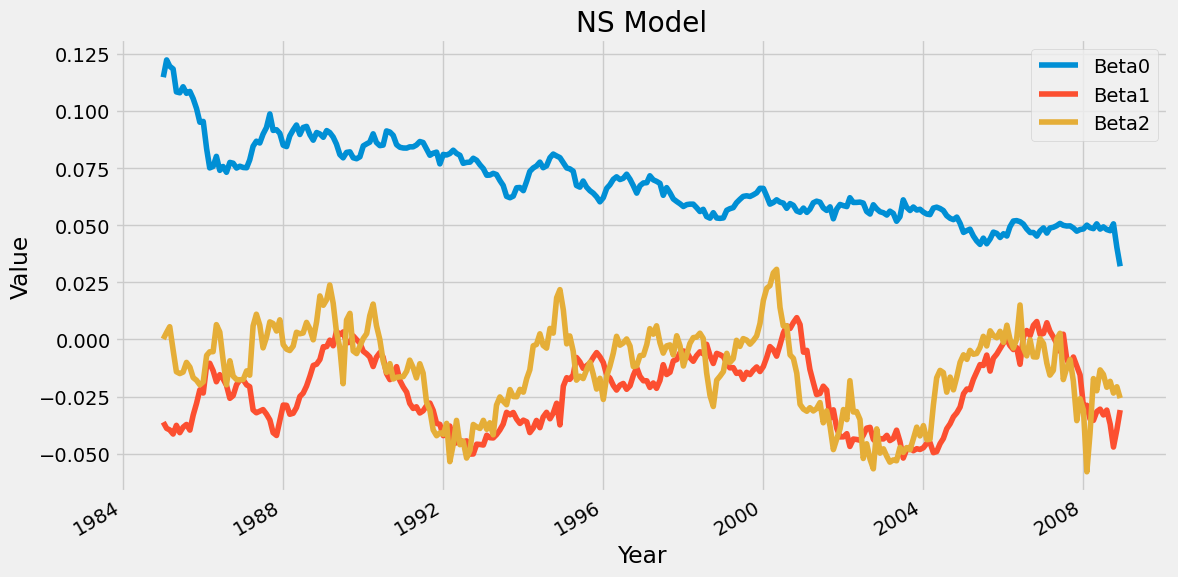

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(curve_df['Date'], curve_df['Beta0'], label="Beta0")
ax.plot(curve_df['Date'], curve_df['Beta1'], label="Beta1")
ax.plot(curve_df['Date'], curve_df['Beta2'], label="Beta2")
#ax.plot(curve_df['Date'], curve_df['Tau'], label="Tau")

ax.set_title("NS Model")
ax.set_xlabel("Year")
ax.set_ylabel("Value")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend(loc=1)

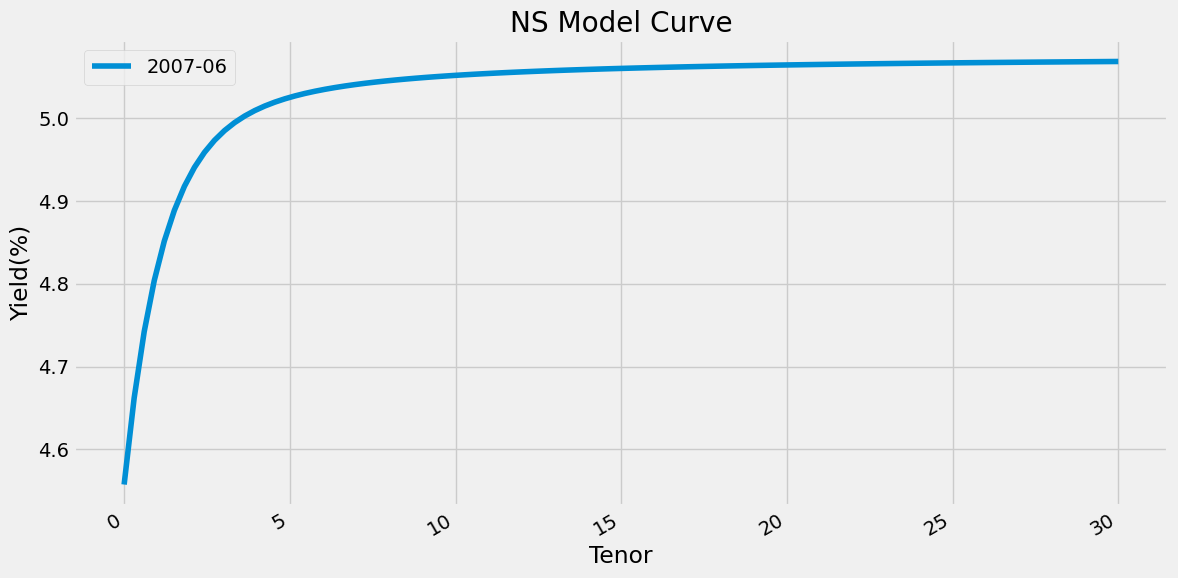

In [62]:
# 选择某一个画出曲线
select_date_str = "2007-06"
select_date = datetime.datetime.strptime(select_date_str, "%Y-%m")
select_curve = curve_df[curve_df['Date']==select_date]['Curve'].tolist()[0]

fig, ax = plt.subplots(figsize=(12, 6))

t = np.linspace(0, 30, 1000)
ax.plot(t, select_curve(t) * 100, label=select_date_str)


ax.set_title("NS Model Curve")
ax.set_xlabel("Tenor")
ax.set_ylabel("Yield(%)")
fig.autofmt_xdate()
plt.tight_layout()
plt.legend(loc=2)

In [63]:
curve_df.to_csv('./data/curve.csv')

In [80]:
def get_curve_data(curve_df):
    result_df = pd.DataFrame()
    date_list = []
    tenor_list = []
    rate_list = []
    for i in range(curve_df.shape[0]):
        N = 100
        temp_date = curve_df['Date'][i]
        temp_curve = curve_df['Curve'][i]
        temp_tenor_list = np.linspace(0, 30, N)
        temp_rate_list = temp_curve(t) * 100
        temp_date_list = [temp_date] * N
        date_list.extend(temp_date_list)
        tenor_list.extend(temp_tenor_list)
        rate_list.extend(temp_rate_list)
    result_df['Date']= date_list
    result_df['Tenor']= tenor_list
    result_df['Rate']= rate_list
    return result_df
curve_data = get_curve_data(curve_df)    
        

In [99]:
curve_data

,Date,Tenor,Rate,Date_Plt
0,1985-01-01,0.000000,7.851097,5479.0
1,1985-01-01,0.303030,8.350808,5479.0
2,1985-01-01,0.606061,8.760823,5479.0
3,1985-01-01,0.909091,9.099077,5479.0
4,1985-01-01,1.212121,9.379700,5479.0
...,...,...,...,...
28795,2008-12-01,28.787879,2.882389,14214.0
28796,2008-12-01,29.090909,2.885703,14214.0
28797,2008-12-01,29.393939,2.888949,14214.0
28798,2008-12-01,29.696970,2.892129,14214.0


In [96]:
date_list = sorted(list(set(curve_data['Date'].tolist())))
date_list

[Timestamp('1985-01-01 00:00:00'),
 Timestamp('1985-02-01 00:00:00'),
 Timestamp('1985-03-01 00:00:00'),
 Timestamp('1985-04-01 00:00:00'),
 Timestamp('1985-05-01 00:00:00'),
 Timestamp('1985-06-01 00:00:00'),
 Timestamp('1985-07-01 00:00:00'),
 Timestamp('1985-08-01 00:00:00'),
 Timestamp('1985-09-01 00:00:00'),
 Timestamp('1985-10-01 00:00:00'),
 Timestamp('1985-11-01 00:00:00'),
 Timestamp('1985-12-01 00:00:00'),
 Timestamp('1986-01-01 00:00:00'),
 Timestamp('1986-02-01 00:00:00'),
 Timestamp('1986-03-01 00:00:00'),
 Timestamp('1986-04-01 00:00:00'),
 Timestamp('1986-05-01 00:00:00'),
 Timestamp('1986-06-01 00:00:00'),
 Timestamp('1986-07-01 00:00:00'),
 Timestamp('1986-08-01 00:00:00'),
 Timestamp('1986-09-01 00:00:00'),
 Timestamp('1986-10-01 00:00:00'),
 Timestamp('1986-11-01 00:00:00'),
 Timestamp('1986-12-01 00:00:00'),
 Timestamp('1987-01-01 00:00:00'),
 Timestamp('1987-02-01 00:00:00'),
 Timestamp('1987-03-01 00:00:00'),
 Timestamp('1987-04-01 00:00:00'),
 Timestamp('1987-05-

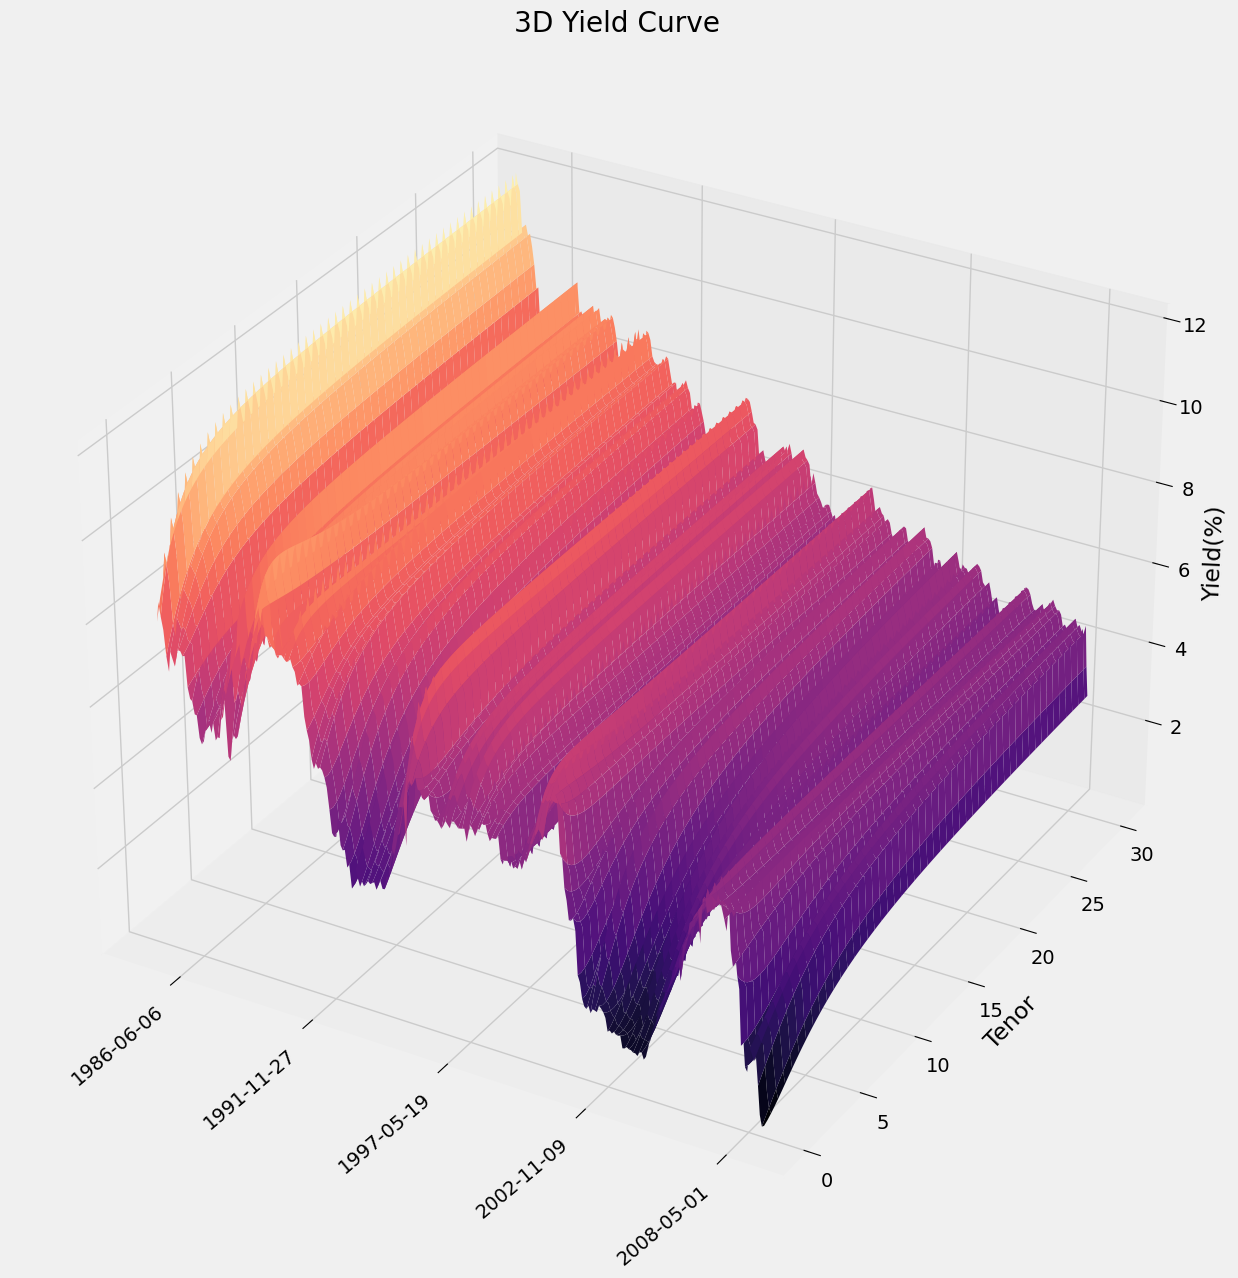

In [102]:
# 画出3维图
import matplotlib

x_data = [] # Dates
y_data = [] # Tenor
z_data = [] # Yield



curve_data['Date_Plt'] = curve_data['Date'].apply(lambda x: matplotlib.dates.date2num(x))
for temp_date in date_list:
    temp_curve = curve_data[curve_data['Date']==temp_date].reset_index(drop=True)
    x_data.append(temp_curve['Date_Plt'].tolist())
    y_data.append(temp_curve['Tenor'].tolist())
    z_data.append(temp_curve['Rate'].tolist())

x = np.array(x_data, dtype="f")
y = np.array(y_data, dtype="f")
z = np.array(z_data, dtype="f")

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x,y,z, rstride=2, cstride=2, cmap="magma", vmin= np.nanmin(z), vmax=np.nanmax(z))
#ax.set_xlabel("Date")
ax.set_ylabel("Tenor")
ax.set_zlabel("Yield(%)")
ax.set_title("3D Yield Curve")

def format_date(x, pos=None):
    return matplotlib.dates.num2date(x).strftime("%Y-%m-%d")

ax.w_xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(format_date))

for tl in ax.w_xaxis.get_ticklabels():
    tl.set_ha("right")
    tl.set_rotation(40)
